# Introduction: First Order Drug Elimination Kinetics


Assuming the concentrations, H and C are determined experimentally for a given population, then $C_0$ is then the drug concentration for a single dose. = $C_0 = H-L$<br/>
Also if $C_0$ is the concentration at time $t=0$, then mathematically <br/>
$$\frac{dC}{dt} = -kC; \; \; \; \; C(0) = C_0$$<br>
$$\int \frac{dC}{dt} = \int - k dt$$
$$\log c = -kt + c$$
$$c = e^{-kt+c}$$
At $t=0$, $c=c_0$
We get, $c_0 = e^{c}$
$$c = \log c_0$$
$$log c = -kt+\log c_0$$


In [1]:
from sympy import *

In [2]:
import matplotlib.pyplot as plt

In [3]:
from matplotlib import rcParams

In [4]:
rcParams['text.usetex'] = True
rcParams['text.latex.unicode'] = True

/home/azazel/Documents/de-sympy/modelling_/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [5]:
from sympy import init_printing
init_printing()

In [6]:
t = Symbol('t')
k = Symbol('k')
C = Function('C')

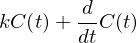

In [7]:
Derivative(C(t), t, 1)+k*C(t)

In [8]:
dsolve(Derivative(C(t), t, 1)+k*C(t))

In [9]:
model_solution = dsolve(Derivative(C(t), t, 1)+k*C(t))

In [10]:
g1 = [model_solution.rhs.subs({"C1":100, k:0.05, t:i}) for i in range(0,100)]
g2 = [model_solution.rhs.subs({"C1":100, k:0.1, t:i}) for i in range(0,100)]
g3 = [model_solution.rhs.subs({"C1":50, k:0.05, t:i}) for i in range(0,100)]

Text(0.5, 1.0, 'Drug Concentration vs Time')

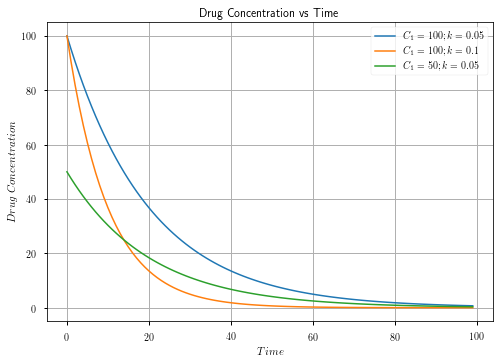

In [17]:
plt.style.use("seaborn-notebook")
xaxis = range(0,100)
plt.plot(xaxis, g1, label="$C_1 = 100; k=0.05$", linewidth=1.5)
plt.plot(xaxis, g2, label="$C_1 = 100; k=0.1$", linewidth=1.5)
plt.plot(xaxis, g3, label="$C_1 = 50; k=0.05$", linewidth=1.5)
plt.grid(True)
plt.legend(loc="best")
plt.xlabel("$Time$")
plt.ylabel("$Drug \; Concentration$")
plt.title("Drug Concentration vs Time")

$$C(t) = $$

In [ ]:
# C0

In [15]:
model_solution.rhs.subs({k:0.05, t:5, "C1":1})

In [31]:
def piecewise_func(n, t, days):
    if t <= days:
        print(sum([model_solution.rhs.subs({"C1":1, k:0.05, t:i}) for i in range(0,5)]))
    if t > n*days and t <= (n+1)*days:
        print(sum([model_solution.rhs.subs({"C1":1, k:0.05, t:i}) for i in range(0,5)] + piecewise_func(n, t, n*d)))

In [32]:
piecewise_func(5, 0, 5)

5*exp(-0.05*t)
